# Exploring and preparing the data

## 1. BICIMAD. Details of the electric bicycle routes

### 1.1. Data presentation

#### 1.1.1. Movements of bycicles

**__id**: identificator of the movement

**user_day_code**: user code. For a same date, all the movement of the sale user have the same code.

**idunplug_station**: number of the origin station

**idunplug_base**: number of origin base

**idplug_station**: number of destination station

**idplug_base**: number of destionation base

**unplug_hourTime**: time the bicycle is picked up

**travel_time**: time in seconds of the ride

**track**: detail of the ride (GeoJSON)

**user_type**: type of user: 

    - 0: not defined
    - 1: anual user
    - 2: ocasional user
    - 3: worker of bicimad
    
**ageRange**: age range of the user:

    - 0: not defined
    - 1: between 0 and 16 years
    - 2: between 17 and 18 years
    - 3: between 19 and 26 years
    - 4: between 27 and 40 years
    - 5: between 41 and 65 years
    - 6: more than 65 years
    
**zip_code**: postal code of the user

### 1.2. Exploratory analysis

In [180]:
#libraries
import numpy as np
import pandas as pd
import json 
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
#We have one file per month, so we read all files and join them in a dataframe
movements_january=pd.read_json('202101_movements.json', lines=True)
movements_february=pd.read_json('202102_movements.json', lines=True)
movements_march=pd.read_json('202103_movements.json', lines=True)
movements_april=pd.read_json('202104_movements.json', lines=True)
movements_may=pd.read_json('202105_movements.json', lines=True)
movements_june=pd.read_json('202106_movements.json', lines=True)

In [182]:
movements = movements_january.append(movements_february).append(movements_march).append(movements_april).append(movements_may).append(movements_june)

In [183]:
movements

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code
0,{'$oid': '5ff4ef7c1b913122a89b52eb'},65c85cbd25549e793455e2a82ae80e02713507a7a8729e...,21,1,21,306,33,5,128,2021-01-01T00:00:00Z,28014
1,{'$oid': '5ff4ef7c1b913122a89b52ed'},9ecabf6d298eec918765e2e8a0e551ee43807c41007ca6...,1,1,15,305,166,3,114,2021-01-01T00:00:00Z,28006
2,{'$oid': '5ff4ef7c1b913122a89b52f6'},42807c2f5734d476415a4f0e0dcc0242c64097e9329d00...,12,1,23,481,163,4,153,2021-01-01T00:00:00Z,28003
3,{'$oid': '5ff4ef7c1b913122a89b52f7'},39caf4c36d7b7175aba98e233f33b935c3bd41bff78e54...,17,1,19,378,9,0,198,2021-01-01T00:00:00Z,
4,{'$oid': '5ff4ef7c1b913122a89b52fa'},94afa1ae74054482a0f5219c367c5510b9a5fc720a1efd...,15,1,1,381,9,0,198,2021-01-01T00:00:00Z,
...,...,...,...,...,...,...,...,...,...,...,...
413365,{'$oid': '60e4d2a51b91313ed4f52e62'},45de608bddfda3f468ef6093c65f6246a2917ce2376e98...,23,1,3,746,234,0,84,2021-06-27T19:00:00Z,
413366,{'$oid': '60e4d2b91b91313ed4f53f9f'},dbec6f034d41c528fd21412197518fe7d11dd0e863d965...,18,3,1,355190,268,0,268,2021-06-28T07:00:00Z,
413367,{'$oid': '60e4d2d51b91313ed4f551ea'},2081c1c1c6c1d9e400b611bcb244b408da53884dffcbbf...,20,3,8,603181,253,5,253,2021-06-25T15:00:00Z,
413368,{'$oid': '60e4d2d61b91313ed4f55226'},dbec6f034d41c528fd21412197518fe7d11dd0e863d965...,11,3,15,13,243,0,243,2021-06-30T08:00:00Z,


In [184]:
#We are interested in predicting the demand, so we remove from the dataframe the movement of the workers of bicimad
movements = movements[movements['user_type'] != 3]

# We are going to remove the trips whose duration is less than 2 minutes and more than 4 hours, 
#considering that these trips are wrong in the table due to errors in the data collection.
movements['travel_time'] = movements['travel_time'] /60
movements = movements[(movements['travel_time']>=2) & (movements['travel_time'] < 240)]

<ipython-input-184-3bff8c030169>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movements['travel_time'] = movements['travel_time'] /60


In [185]:
movements.describe()

,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station
count,1.823247e+06,1.823247e+06,1.823247e+06,1.823247e+06,1.823247e+06,1.823247e+06,1.823247e+06
mean,1.234866e+01,1.050622e+00,1.232863e+01,1.627604e+01,1.219549e+02,1.892394e+00,1.219032e+02
std,7.580110e+00,4.813287e-01,7.557393e+00,1.683222e+01,7.369394e+01,2.200645e+00,7.384668e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,5.000000e+00,1.000000e+00,5.000000e+00,8.466667e+00,5.600000e+01,0.000000e+00,5.600000e+01
50%,1.200000e+01,1.000000e+00,1.200000e+01,1.258333e+01,1.210000e+02,0.000000e+00,1.210000e+02
75%,1.900000e+01,1.000000e+00,1.900000e+01,1.835000e+01,1.830000e+02,4.000000e+00,1.830000e+02
max,3.000000e+01,7.000000e+00,3.000000e+01,2.399500e+02,2.700000e+02,6.000000e+00,2.009000e+03


In [186]:
movements.columns

Index(['_id', 'user_day_code', 'idplug_base', 'user_type', 'idunplug_base',
       'travel_time', 'idunplug_station', 'ageRange', 'idplug_station',
       'unplug_hourTime', 'zip_code'],
      dtype='object')

In [187]:
#!pip install iso8601
import iso8601
import datetime
import calendar

In [188]:
movements['datetime'] = pd.to_datetime(movements['unplug_hourTime'])
movements['date'] = movements['datetime'].dt.date
movements['weekday'] = movements['datetime'].dt.day_name()
movements['hour'] = movements['datetime'].dt.hour
movements['month'] = movements['datetime'].dt.month


In [189]:
movements

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code,datetime,date,weekday,hour,month
0,{'$oid': '5ff4ef7c1b913122a89b52eb'},65c85cbd25549e793455e2a82ae80e02713507a7a8729e...,21,1,21,5.100000,33,5,128,2021-01-01T00:00:00Z,28014,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1
1,{'$oid': '5ff4ef7c1b913122a89b52ed'},9ecabf6d298eec918765e2e8a0e551ee43807c41007ca6...,1,1,15,5.083333,166,3,114,2021-01-01T00:00:00Z,28006,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1
2,{'$oid': '5ff4ef7c1b913122a89b52f6'},42807c2f5734d476415a4f0e0dcc0242c64097e9329d00...,12,1,23,8.016667,163,4,153,2021-01-01T00:00:00Z,28003,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1
3,{'$oid': '5ff4ef7c1b913122a89b52f7'},39caf4c36d7b7175aba98e233f33b935c3bd41bff78e54...,17,1,19,6.300000,9,0,198,2021-01-01T00:00:00Z,,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1
4,{'$oid': '5ff4ef7c1b913122a89b52fa'},94afa1ae74054482a0f5219c367c5510b9a5fc720a1efd...,15,1,1,6.350000,9,0,198,2021-01-01T00:00:00Z,,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413359,{'$oid': '60e3812c1b9131285030f696'},36d40b49fafe4e7f41919089b609debf52f1ee42f3e752...,14,1,20,14.016667,132,5,265,2021-06-30T23:00:00Z,28020,2021-06-30 23:00:00+00:00,2021-06-30,Wednesday,23,6
413360,{'$oid': '60e381341b9131285030fefb'},04ea09adba4c3e5e9e9142362b0fca2187530f31834001...,23,1,9,24.666667,182,5,265,2021-06-30T21:00:00Z,28005,2021-06-30 21:00:00+00:00,2021-06-30,Wednesday,21,6
413361,{'$oid': '60e381351b9131285030ff15'},d26c47762f73fbdca3fefb34830f72f2df1538f9926c73...,22,1,3,12.700000,15,5,265,2021-06-29T18:00:00Z,28791,2021-06-29 18:00:00+00:00,2021-06-29,Tuesday,18,6
413365,{'$oid': '60e4d2a51b91313ed4f52e62'},45de608bddfda3f468ef6093c65f6246a2917ce2376e98...,23,1,3,12.433333,234,0,84,2021-06-27T19:00:00Z,,2021-06-27 19:00:00+00:00,2021-06-27,Sunday,19,6


In [190]:
df_movements = movements.groupby(['date', 'weekday', 'hour', 'month'])._id.count().reset_index()

In [191]:
df_movements

,date,weekday,hour,month,_id
0,2021-01-01,Friday,0,1,244
1,2021-01-01,Friday,1,1,25
2,2021-01-01,Friday,2,1,5
3,2021-01-01,Friday,3,1,2
4,2021-01-01,Friday,4,1,10
...,...,...,...,...,...
4313,2021-06-30,Wednesday,19,6,813
4314,2021-06-30,Wednesday,20,6,552
4315,2021-06-30,Wednesday,21,6,571
4316,2021-06-30,Wednesday,22,6,499


##### Plot the evolution of total demand in the month of june

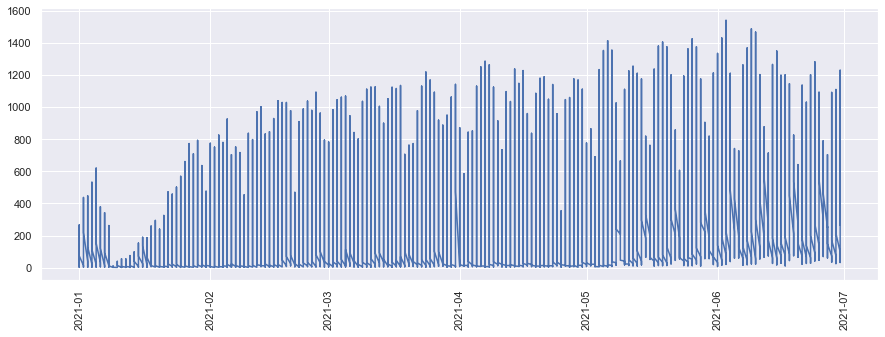

In [192]:
plt.figure(figsize=(15,5))

plt.plot(df_movements['date'], df_movements['_id'])
plt.xticks(rotation=90);

Conclusions of the plot:
- The demand of rides follows a temporal serie
- In january there are less rides than the rest of the year (could it be that the data is not good for that month?)
- We see that the demand rises with time , in may and june is higher, this can be influenciated by the weather
- The demand follows a patterns, depending of the day of the week

In [193]:
movements_january = df_movements[df_movements['month'] == 1]
movements_february = df_movements[df_movements['month'] == 2]
movements_march = df_movements[df_movements['month'] == 3]
movements_april = df_movements[df_movements['month'] == 4]
movements_may = df_movements[df_movements['month'] == 5]
movements_june = df_movements[df_movements['month'] == 6]




In [194]:
plt.plot?

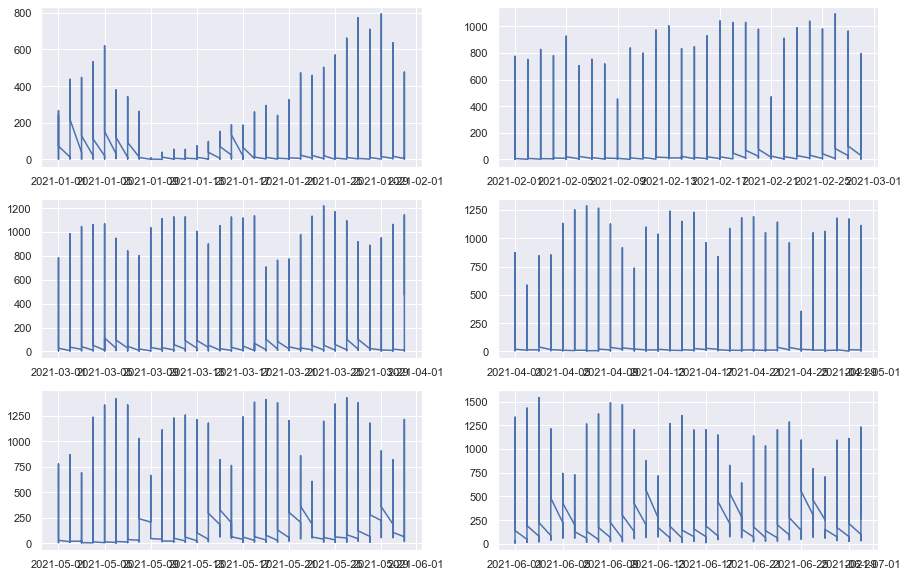

In [195]:
fig, ax = plt.subplots(3,2)
fig.set_size_inches(15,10)
ax[0,0].plot(movements_january['date'], movements_january['_id'], label='January')
ax[0,1].plot(movements_february['date'], movements_february['_id'], label='February')
ax[1,0].plot(movements_march['date'], movements_march['_id'], label='March')
ax[1,1].plot(movements_april['date'], movements_april['_id'], label='April')
ax[2,0].plot(movements_may['date'], movements_may['_id'], label='May')
ax[2,1].plot(movements_june['date'], movements_june['_id'], label='June')




There are months, such as march and april, where the demand is quite similar around time (same variation) 

###### Some information per months

In [196]:
movements_by_month= movements.groupby(['month'])._id.count().reset_index()

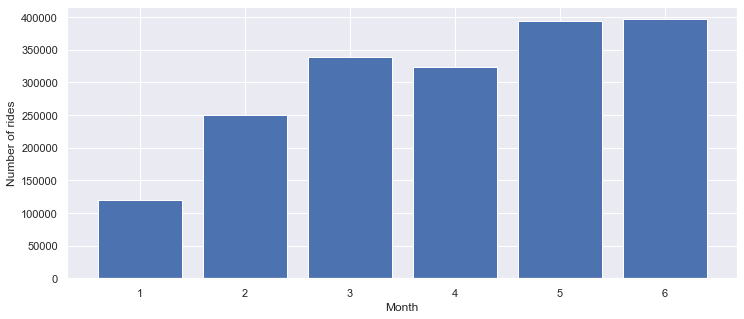

In [197]:
plt.figure(figsize=(12,5))
plt.bar(movements_by_month['month'], height =movements_by_month['_id']);
plt.xlabel("Month")
plt.ylabel("Number of rides");

##### Plots to understand the movements by day of week

In [198]:
df_movements

,date,weekday,hour,month,_id
0,2021-01-01,Friday,0,1,244
1,2021-01-01,Friday,1,1,25
2,2021-01-01,Friday,2,1,5
3,2021-01-01,Friday,3,1,2
4,2021-01-01,Friday,4,1,10
...,...,...,...,...,...
4313,2021-06-30,Wednesday,19,6,813
4314,2021-06-30,Wednesday,20,6,552
4315,2021-06-30,Wednesday,21,6,571
4316,2021-06-30,Wednesday,22,6,499


In [200]:
weekday_dic = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 
             'Thursday': 4, 'Friday': 5, 'Saturday': 6,
             'Sunday': 7}
weekdays = pd.DataFrame([[key, weekday_dic[key]] for key in weekday_dic.keys()], columns = ['weekday', 'number'])
weekdays

,weekday,number
0,Monday,1
1,Tuesday,2
2,Wednesday,3
3,Thursday,4
4,Friday,5
5,Saturday,6
6,Sunday,7


In [201]:
movements_by_day_of_week = df_movements.groupby(['weekday', 'month']).sum('_id').reset_index()
movements_by_day_of_week=movements_by_day_of_week.merge(weekdays, how='inner', left_on='weekday', right_on='weekday')
movements_by_day_of_week= movements_by_day_of_week.sort_values(by='number',ascending=True)

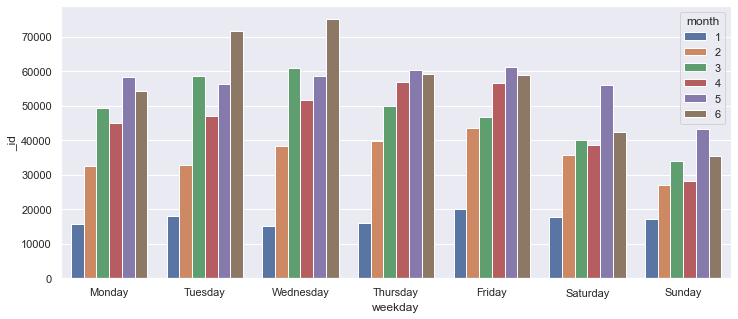

In [204]:
plt.figure(figsize=(12,5))
sns.barplot(x=movements_by_day_of_week['weekday'], y = movements_by_day_of_week['_id'], hue=movements_by_day_of_week['month']);


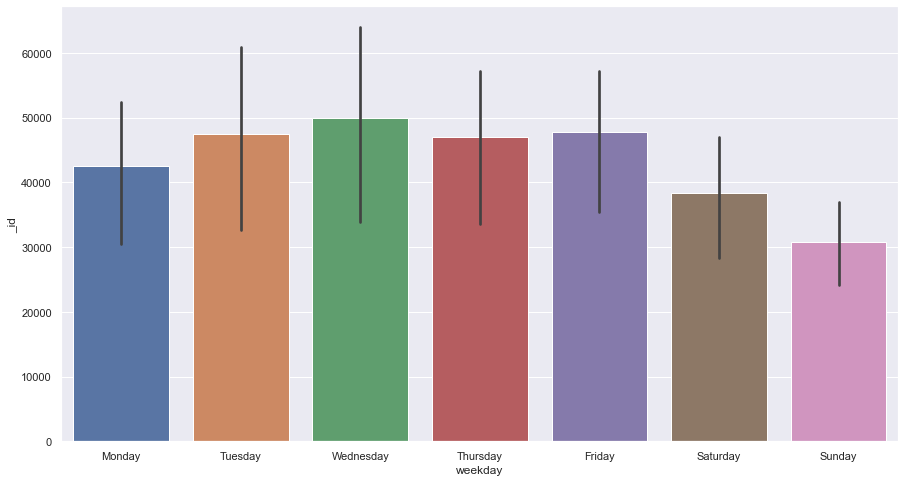

In [205]:
sns.barplot(x=movements_by_day_of_week['weekday'], y = movements_by_day_of_week['_id']);

Conclusions:
- From the plot we observate that the demand is higher in the laboral days, while in the weekend the demand is lower, this can be related with the usage of the service during trips to work

In [15]:
#From the plot we observate that the demand is higher in the laboral days, while in the weekend the demand is lower

##### Plots to understand the movements by hour

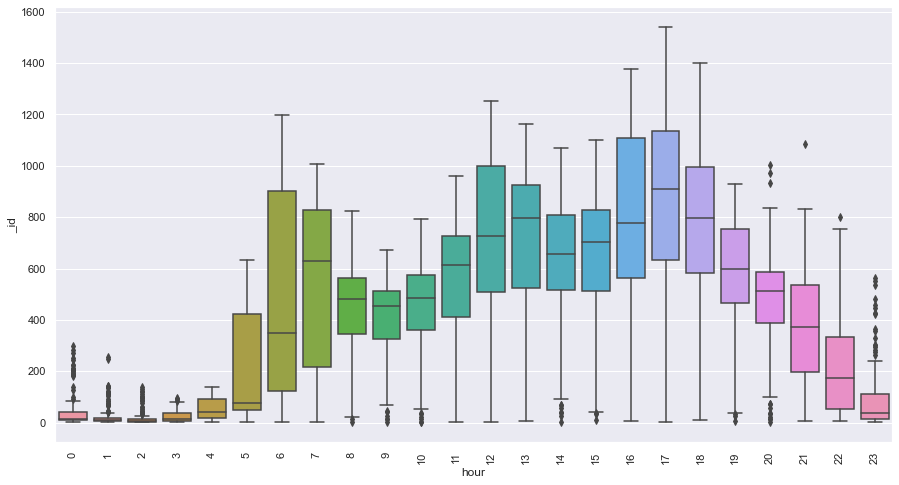

In [206]:
sns.set(rc = {'figure.figsize': (15,8)})
ax = sns.boxplot(x='hour', y = '_id', data = df_movements);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Conclusions:
- The most popular hours to take the bike are 7 am (this could be related with the travel to work), and between 12 and 13 pm and between 17 and 18 pm

In [129]:
## Pendiente: EVALUAR LAS HORAS POR DIAS DE LA SEMANA

#### Analyzing the travel time

<AxesSubplot:xlabel='weekday', ylabel='travel_time'>

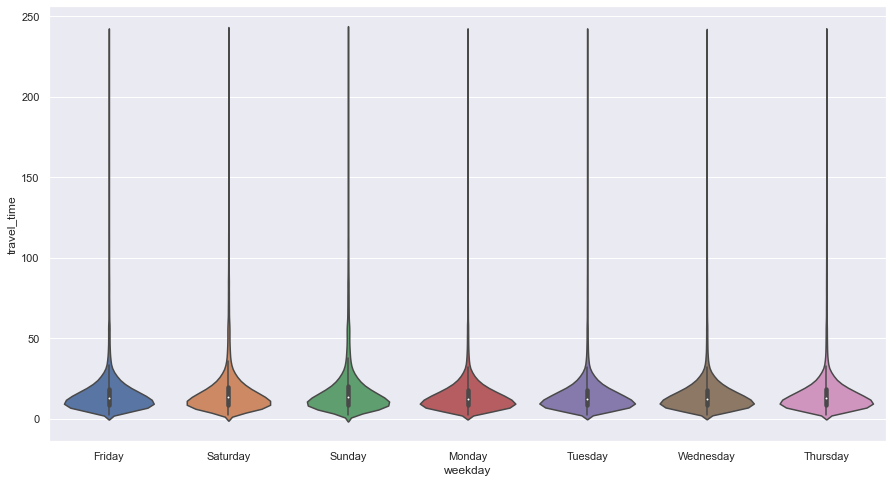

In [207]:
sns.violinplot(x=movements['weekday'], y = movements['travel_time'], data=movements)

<ipython-input-208-64e3a3188244>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
C:\Users\paula\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


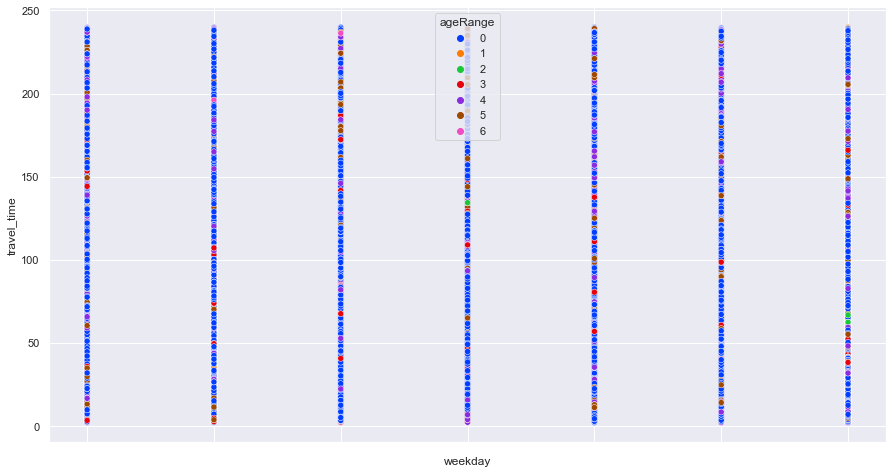

In [208]:
sns.set(rc = {'figure.figsize': (15,8)})
ax = sns.scatterplot(x='weekday', y = 'travel_time', data = movements, hue='ageRange', palette='bright');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

<AxesSubplot:>

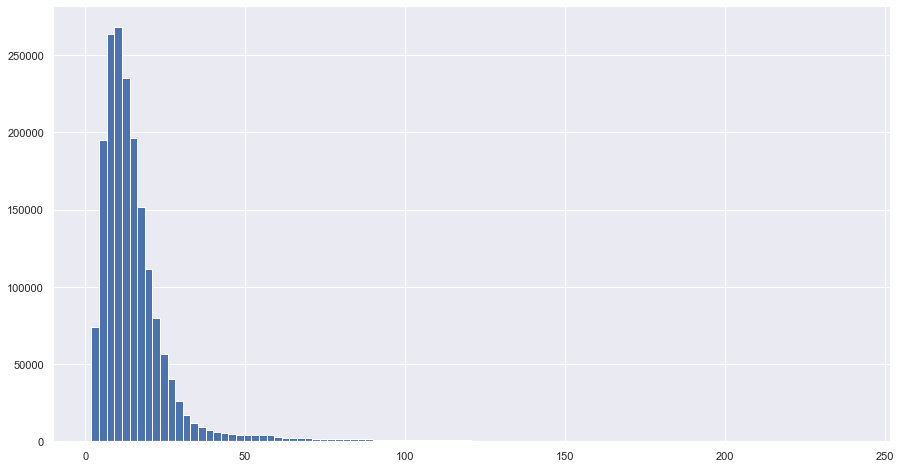

In [209]:
#Distribution of the rides by travel time (in minutes)
movements['travel_time'].hist(bins=100)

#### Analyzing data by age of the user

In [213]:
age_Range_dic = {0: 'not defined', 1: '0 - 16 years', 2: '17 - 18 years', 
             3: '19 - 26 years',4: '27 - 40 years', 5: '41 - 65 years',
             6: ' more 65 years'}

age_Range = pd.DataFrame([[key, age_Range_dic[key]] for key in age_Range_dic.keys()], columns = ['id', 'range'])
age_Range

,id,range
0,0,not defined
1,1,0 - 16 years
2,2,17 - 18 years
3,3,19 - 26 years
4,4,27 - 40 years
5,5,41 - 65 years
6,6,more 65 years


In [214]:
rides_per_age=movements.groupby('ageRange')['user_type'].count().reset_index()
rides_per_age=rides_per_age.merge(age_Range, how='inner', left_on='ageRange', right_on='id')

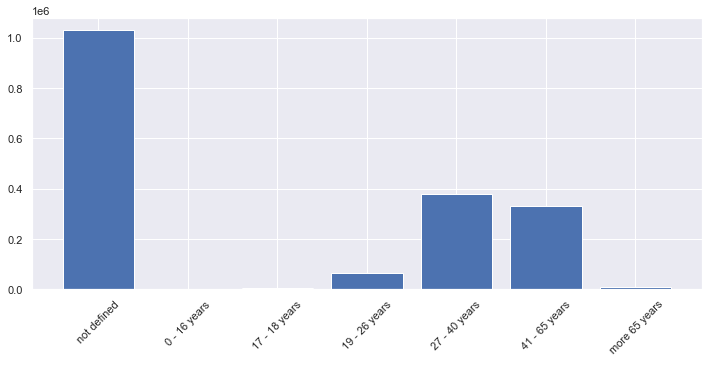

In [215]:
plt.figure(figsize=(12,5))
plt.bar(rides_per_age['range'], height = rides_per_age['user_type']);
plt.xticks(rotation=45);

We observate that in most of the data the age range is not defined, we are not going to eliminate these rows, so we could loss a lot of information

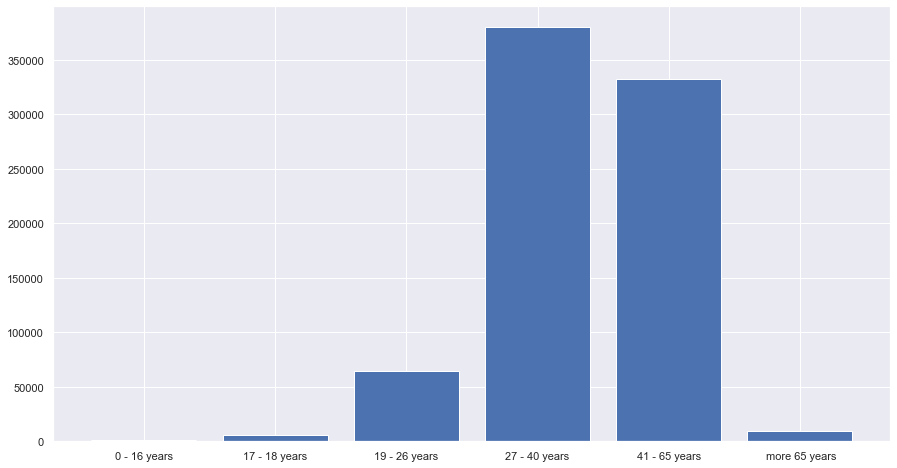

In [216]:
rides_per_age = rides_per_age[rides_per_age['ageRange']!= 0]
plt.bar(rides_per_age['range'], height = rides_per_age['user_type']);


Conclusions:
- The data of the column age Range is not well obtained, despite this, we know that people between 27 and 65 years are the principal users of the service
- This range is very high so we can not extract very useful information from here

 #### 1.1.2. Stations data

In the document 202106 we have information about the situation of the stations per day and hour, this file contains the following columns:

**id**: code of the base station

**latitude**: latitude of the station in WGS84 format

**longitude**: lenght of the station in WGS84 format

**name**: name of the station

**light**: ocupation of the station:

    - 0: low
    - 1: medium
    - 2: high
    - 3: inactive

**number**: logical designation of the Base Station

**activate**: active station
    - 0: not active
    - 1: active
    
**no_available**: station availability
    - 0: available
    - 1: unavailable

**total_bases**: number of bases of the station

**dock_bikes**: number of docked bicycles

**free_bases**: number of free bases

**reservations_count**: number of active reservations


We are going to use this data to get the name and coordinates of the stations

In [217]:
stations = pd.read_json('202106.json', lines=True)
stations.head()

,_id,stations
0,2021-06-01T00:43:39.688214,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
1,2021-06-01T01:43:41.872092,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
2,2021-06-01T02:43:42.969250,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
3,2021-06-01T03:43:44.600717,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
4,2021-06-01T04:43:45.629938,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."


We want to know the number of total bases available in each stations and the information about the latitude and longitude of them, so we can consider only the first row of the file, because the information we are looking for not depend of the hour and day

In [218]:
stations = stations['stations'][0]
stations = pd.DataFrame(stations)

In [219]:
stations.head()

,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,latitude,dock_bikes,id
0,1,Puerta del Sol A,0,0,30,26,1a,-3.7018341,0,Puerta del Sol nº 1,40.4172137,3,1
1,1,Puerta del Sol B,0,0,30,28,1b,-3.701602938060457,0,Puerta del Sol nº 1,40.41731271011562,2,2
2,1,Miguel Moya,0,0,24,20,2,-3.7058415,0,Calle Miguel Moya nº 1,40.4205886,1,3
3,1,Plaza Conde Suchil,0,1,18,2,3,-3.7069171,0,Plaza del Conde del Valle de Súchil nº 3,40.4302937,12,4
4,1,Malasaña,0,2,24,15,4,-3.7025875,0,Calle Manuela Malasaña nº 5,40.4285524,7,5


In [220]:
stations = stations[['name', 'longitude', 'latitude', 'address', 'total_bases', 'id']]

##### Number of stations and location

There are 264 stations of bicimad, we are going to use the library folium to plot the locations on a map

In [221]:
stations.describe()

,total_bases,id
count,264.000000,264.000000
mean,23.920455,136.829545
std,1.877756,77.475946
min,12.000000,1.000000
25%,24.000000,71.750000
50%,24.000000,137.500000
75%,24.000000,203.250000
max,30.000000,270.000000


In [222]:
#!pip install folium
import folium

In [223]:
stations['longitude'] = stations['longitude'].astype('float')
stations['latitude'] = stations['latitude'].astype('float')

In [224]:
#we create a map with the location of interest (Madrid)
bike_stations = folium.Map(location=[stations.latitude.mean(), 
                           stations.longitude.mean()],
                 zoom_start=14, control_scale=True)

In [225]:
for index, location_info in stations.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], 
                  popup=location_info["name"]).add_to(bike_stations)

In [226]:
bike_stations

##### Number of rides per station (origin station)

In [232]:
rides_origin = movements.merge(stations, how='inner', left_on='idunplug_station', right_on='id')

In [234]:
rides_origin = rides_origin.groupby('id')['_id'].count()

In [235]:
rides_origin = rides_origin.reset_index()

In [236]:
rides_origin = rides_origin.merge(stations, how = 'inner', right_on= 'id', left_on='id')

In [237]:
rides_origin

,id,_id,name,longitude,latitude,address,total_bases
0,1,7879,Puerta del Sol A,-3.701834,40.417214,Puerta del Sol nº 1,30
1,2,3834,Puerta del Sol B,-3.701603,40.417313,Puerta del Sol nº 1,30
2,3,7487,Miguel Moya,-3.705842,40.420589,Calle Miguel Moya nº 1,24
3,4,7118,Plaza Conde Suchil,-3.706917,40.430294,Plaza del Conde del Valle de Súchil nº 3,18
4,5,5542,Malasaña,-3.702587,40.428552,Calle Manuela Malasaña nº 5,24
...,...,...,...,...,...,...,...
259,266,784,Ciudad Universitaria 1,-3.726990,40.443750,Avenida de la Complutense (Metro Ciudad Univer...,24
260,267,1954,Ciudad Universitaria 2,-3.726930,40.443420,Avenida de la Complutense (Metro Ciudad Univer...,24
261,268,2756,Facultad Biología,-3.727310,40.449120,Calle José Antonio Novais frente al nº 12,24
262,269,2517,Facultad Derecho,-3.729370,40.451090,Avenida Complutense nº 23,24


In [238]:
#Now we have a dataframe with the number of rides per station, we can evaluate which stations have the most rides

In [239]:
rides_origin = rides_origin.sort_values(by='_id', ascending=False)

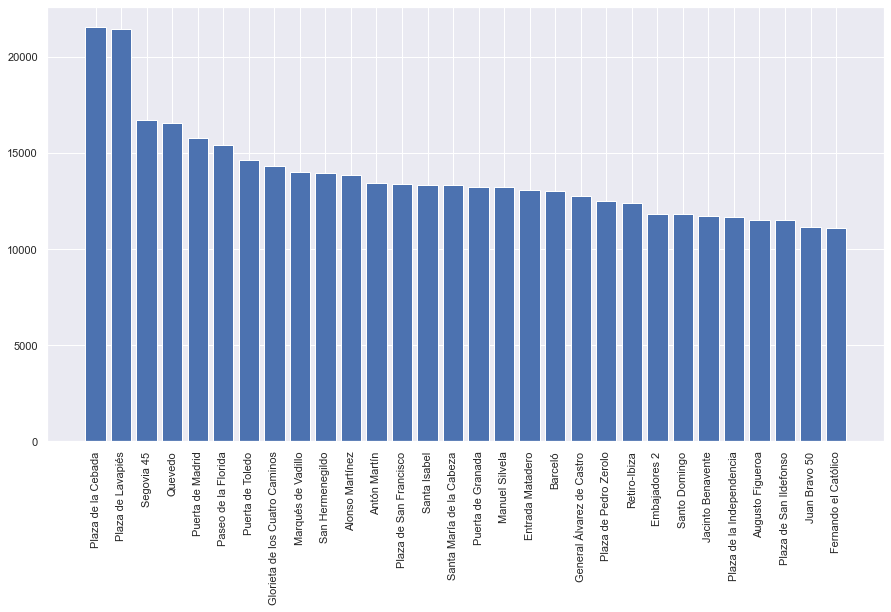

In [240]:
#plot: 30 stations with the most
rides_origin = rides_origin.head(30)
plt.figure(figsize=(15,8))
plt.bar(rides_origin['name'], height = rides_origin['_id']);
plt.xticks(rotation=90);

##### Number of rides per station (destination station)

In [241]:
rides_destination = movements.merge(stations, how='inner', left_on='idplug_station', right_on='id')

In [243]:
rides_destination = rides_destination.groupby('id')['_id'].count()
rides_destination = rides_destination.reset_index()
rides_destination = rides_destination.merge(stations, how = 'inner', right_on= 'id', left_on='id')
rides_destination = rides_destination.sort_values(by='_id', ascending=False)

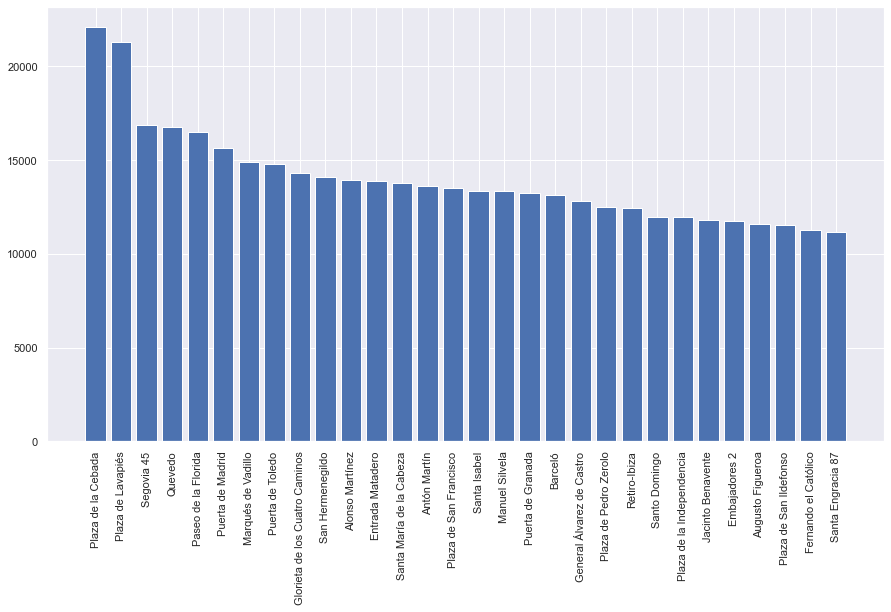

In [244]:
#plot: 30 stations with the most
rides_destination = rides_destination.head(30)
plt.figure(figsize=(15,8))
plt.bar(rides_destination['name'], height = rides_destination['_id']);
plt.xticks(rotation=90);

Comparing both charts, we can see that the most popular stations for picking a bike are the same that those for leaving the bike

#### 1.1.3.Adding useful information to the dataframe

We are going to add useful information for the predictive models. One of the important is the type of day (holiday, working day, weekend).

We use a dataframe obtained from the open data portal of the community of madrid.

In [245]:
holidays_df = pd.read_csv('calendario.csv', sep=';', names=(['day', 'day_week', 'holiday', 'type', 'festivity']))

In [246]:
#We are only interested in knowing the holidays
holidays_df = holidays_df[holidays_df['holiday']=='festivo']

In [247]:
holidays_df['date'] = pd.to_datetime(holidays_df['day'], dayfirst=True)
holidays_df


,day,day_week,holiday,type,festivity,date
1,01/01/2013,martes,festivo,Festivo nacional,Año Nuevo,2013-01-01
7,07/01/2013,lunes,festivo,Festivo nacional,Traslado Epifanía del Señor,2013-01-07
77,18/03/2013,lunes,festivo,Festivo de la Comunidad de Madrid,Traslado San Jose,2013-03-18
87,28/03/2013,jueves,festivo,Festivo de la comunidad de Madrid,Jueves Santo,2013-03-28
88,29/03/2013,viernes,festivo,Festivo nacional,Viernes Santo,2013-03-29
...,...,...,...,...,...,...
2549,25/12/2019,miércoles,festivo,Festivo nacional,Natividad del Señor,2019-12-25
2556,01/01/2020,miércoles,festivo,Festivo nacional,Año Nuevo,2020-01-01
2561,06/01/2020,lunes,festivo,Festivo nacional,Epifanía del Señor,2020-01-06
2922,01/01/2021,viernes,festivo,Festivo nacional,Año Nuevo,2021-01-01


In [248]:
movements['date'] = movements.date.astype('datetime64[ns]')


In [249]:
holidays_df['date']=holidays_df.date.astype('datetime64[ns]')


In [250]:
movements_final = movements.merge(holidays_df, how='left', on= 'date')

In [251]:
movements_final

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,...,datetime,date,weekday,hour,month,day,day_week,holiday,type,festivity
0,{'$oid': '5ff4ef7c1b913122a89b52eb'},65c85cbd25549e793455e2a82ae80e02713507a7a8729e...,21,1,21,5.100000,33,5,128,2021-01-01T00:00:00Z,...,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1,01/01/2021,viernes,festivo,Festivo nacional,Año Nuevo
1,{'$oid': '5ff4ef7c1b913122a89b52ed'},9ecabf6d298eec918765e2e8a0e551ee43807c41007ca6...,1,1,15,5.083333,166,3,114,2021-01-01T00:00:00Z,...,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1,01/01/2021,viernes,festivo,Festivo nacional,Año Nuevo
2,{'$oid': '5ff4ef7c1b913122a89b52f6'},42807c2f5734d476415a4f0e0dcc0242c64097e9329d00...,12,1,23,8.016667,163,4,153,2021-01-01T00:00:00Z,...,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1,01/01/2021,viernes,festivo,Festivo nacional,Año Nuevo
3,{'$oid': '5ff4ef7c1b913122a89b52f7'},39caf4c36d7b7175aba98e233f33b935c3bd41bff78e54...,17,1,19,6.300000,9,0,198,2021-01-01T00:00:00Z,...,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1,01/01/2021,viernes,festivo,Festivo nacional,Año Nuevo
4,{'$oid': '5ff4ef7c1b913122a89b52fa'},94afa1ae74054482a0f5219c367c5510b9a5fc720a1efd...,15,1,1,6.350000,9,0,198,2021-01-01T00:00:00Z,...,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1,01/01/2021,viernes,festivo,Festivo nacional,Año Nuevo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823242,{'$oid': '60e3812c1b9131285030f696'},36d40b49fafe4e7f41919089b609debf52f1ee42f3e752...,14,1,20,14.016667,132,5,265,2021-06-30T23:00:00Z,...,2021-06-30 23:00:00+00:00,2021-06-30,Wednesday,23,6,NaN,NaN,NaN,NaN,NaN
1823243,{'$oid': '60e381341b9131285030fefb'},04ea09adba4c3e5e9e9142362b0fca2187530f31834001...,23,1,9,24.666667,182,5,265,2021-06-30T21:00:00Z,...,2021-06-30 21:00:00+00:00,2021-06-30,Wednesday,21,6,NaN,NaN,NaN,NaN,NaN
1823244,{'$oid': '60e381351b9131285030ff15'},d26c47762f73fbdca3fefb34830f72f2df1538f9926c73...,22,1,3,12.700000,15,5,265,2021-06-29T18:00:00Z,...,2021-06-29 18:00:00+00:00,2021-06-29,Tuesday,18,6,NaN,NaN,NaN,NaN,NaN
1823245,{'$oid': '60e4d2a51b91313ed4f52e62'},45de608bddfda3f468ef6093c65f6246a2917ce2376e98...,23,1,3,12.433333,234,0,84,2021-06-27T19:00:00Z,...,2021-06-27 19:00:00+00:00,2021-06-27,Sunday,19,6,NaN,NaN,NaN,NaN,NaN


In [252]:
movements_final.to_csv('movements_df.csv')